In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [37]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [38]:
torch.manual_seed(77)
e = torch.randint(-8,9,(50,1),dtype = torch.float)
print(e)

tensor([[ 5.],
        [-2.],
        [ 2.],
        [-3.],
        [ 3.],
        [-3.],
        [ 5.],
        [-4.],
        [-2.],
        [-5.],
        [-6.],
        [ 7.],
        [ 6.],
        [-4.],
        [ 1.],
        [-1.],
        [ 6.],
        [-5.],
        [-2.],
        [ 1.],
        [-6.],
        [-7.],
        [-1.],
        [ 3.],
        [ 7.],
        [-7.],
        [-5.],
        [-8.],
        [ 1.],
        [ 8.],
        [-2.],
        [-5.],
        [ 1.],
        [-8.],
        [-8.],
        [-5.],
        [ 3.],
        [ 8.],
        [-4.],
        [ 3.],
        [ 1.],
        [ 7.],
        [ 7.],
        [ 4.],
        [ 3.],
        [ 5.],
        [-1.],
        [ 6.],
        [ 7.],
        [ 7.]])


In [39]:
y = 2 * X + 1 + e

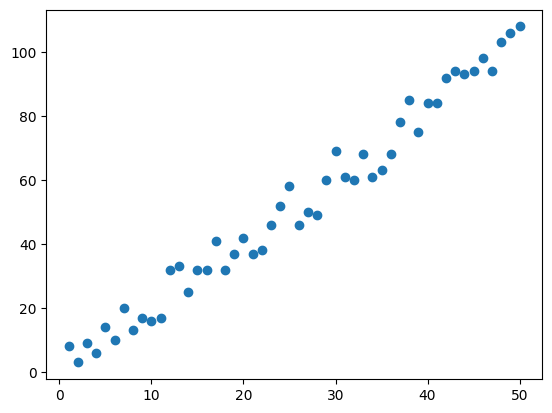

In [40]:
plt.scatter(X.numpy(),y.numpy())

In [41]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [42]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
    
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred


In [43]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [44]:
for name, param in model.named_parameters():
    print(name,'\t',param.item())


linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [45]:
x = torch.tensor([2.])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [46]:
x1 = np.linspace(0,50.0,50)


In [47]:
w1 = 0.1059
b1 = 0.9637
y1 = w1 * x1 + b1

In [48]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

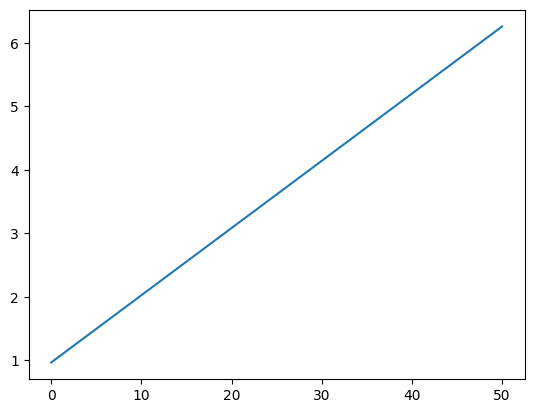

In [49]:
plt.plot(x1,y1)

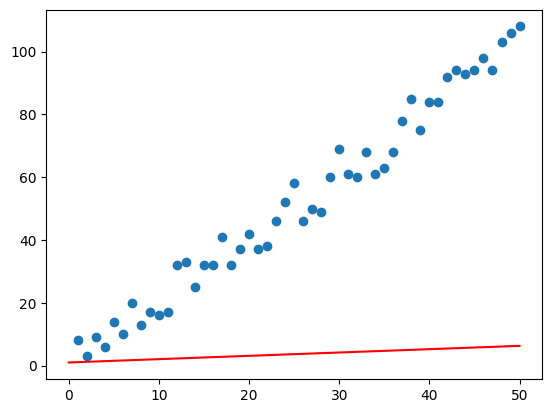

In [50]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')

In [51]:
# writing activation function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)
epochs = 50
losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    print(f"Epoch {i}, loss:  {loss.item()}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 1, loss:  3199.159423828125, weight: 0.10597813129425049, bias: 0.9637961387634277
Epoch 2, loss:  1663.35986328125, weight: 3.407900333404541, bias: 1.060983657836914
Epoch 3, loss:  870.4804077148438, weight: 1.0354652404785156, bias: 0.9895787835121155
Epoch 4, loss:  461.1449279785156, weight: 2.740143060684204, bias: 1.0393109321594238
Epoch 5, loss:  249.81907653808594, weight: 1.515352487564087, bias: 1.0020049810409546
Epoch 6, loss:  140.71856689453125, weight: 2.395429849624634, bias: 1.0272380113601685
Epoch 7, loss:  84.3935546875, weight: 1.7631276845932007, bias: 1.0075366497039795
Epoch 8, loss:  55.3145751953125, weight: 2.2174930572509766, bias: 1.0201220512390137
Epoch 9, loss:  40.30176544189453, weight: 1.8910713195800781, bias: 1.0095096826553345
Epoch 10, loss:  32.5507926940918, weight: 2.125657081604004, bias: 1.0155659914016724
Epoch 11, loss:  28.548818588256836, weight: 1.9571501016616821, bias: 1.0096462965011597
Epoch 12, loss:  26.482332229614258, we

Text(0.5, 0, 'No of Epochs')

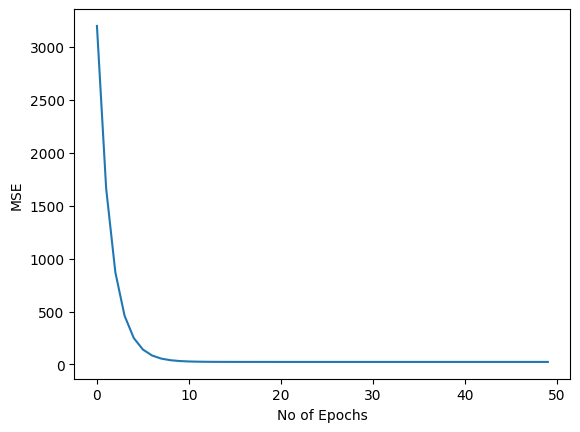

In [52]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE')
plt.xlabel('No of Epochs')

3199.159423828125
